In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from planets_grid.planets import Planet
import corner
from scipy import stats

In [2]:
matplotlib.rcParams['figure.facecolor'] = 'white'

In [3]:
testC = Planet('testC', 
                7.50, 0.23, 
                2.19, 0.07, 
                'data/146c_fine', 
                mpList=np.arange(6.7,8.4+0.1,0.1), 
                fList=([0.001, 0.002, 0.003] + list(np.arange(0.004, 0.034+0.002, 0.002))),
                orbitalList=[0.03392],
                entropyList=[7.27,7.27,7.28,7.28,7.28,7.29,7.29,7.3,7.3,7.3,7.31,7.31,
                            7.32,7.32,7.32,7.33,7.33,7.34]
                )

In [4]:
print(testC.orbitalList)

[0.03392]


In [5]:
testB = Planet('testB',
               5.77, 0.18,
               2.04, 0.06,
               'data/146b_fine',
               mpList=np.arange(5.1,6.6+0.1,0.1),
               fList=np.arange(0.004,0.02+0.001,0.001),
               orbitalList=[0.02584],
               entropyList=[7.20, 7.21, 7.21, 7.22, 7.22, 7.22, 7.23, 7.23,
                            7.24, 7.24, 7.24, 7.25, 7.25, 7.26, 7.26, 7.26]
              )

In [6]:
print(testB.orbitalList)

[0.02584]


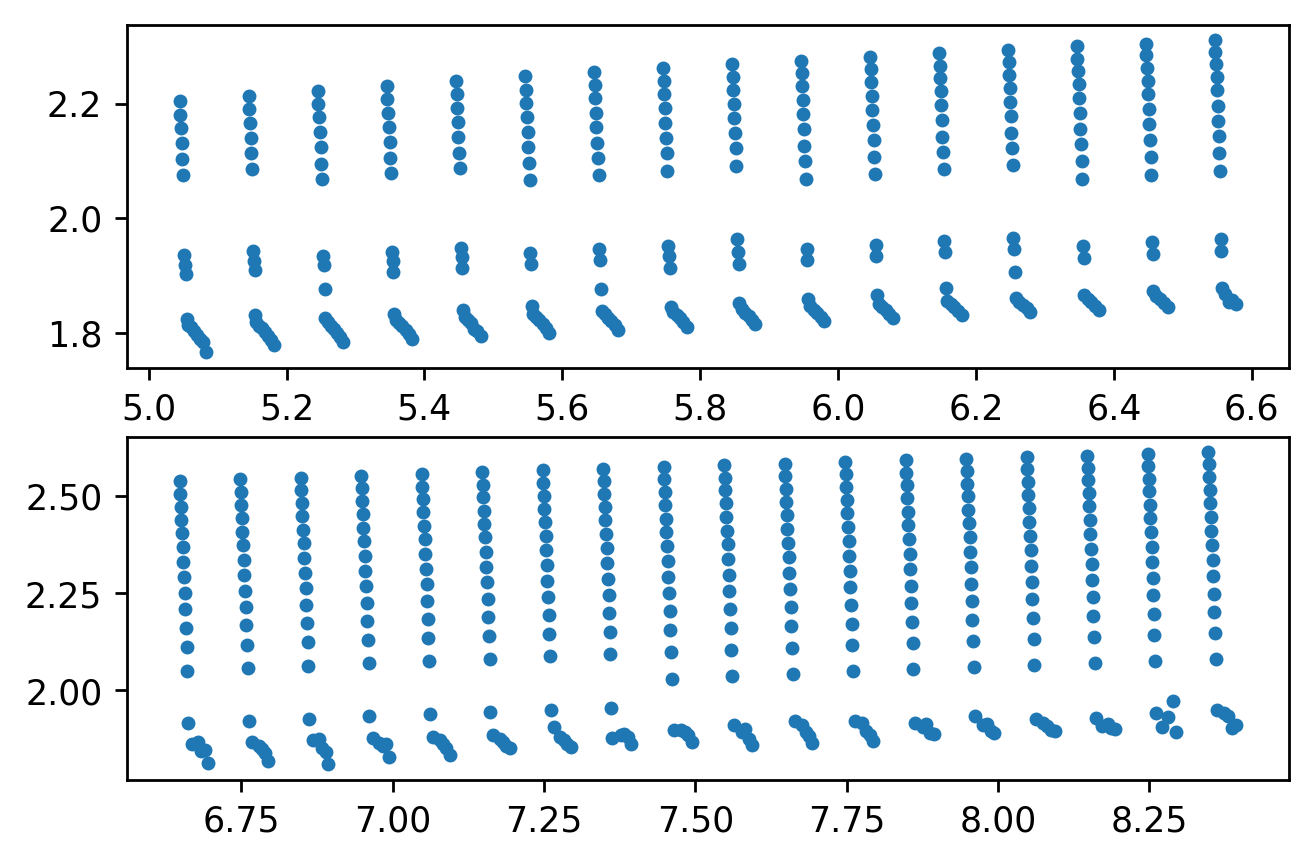

In [7]:
plt.subplot(211)
plt.plot(testB.final_masses,testB.final_radii,'.')
plt.gcf().set_dpi(250)

plt.subplot(212)
plt.plot(testC.final_masses,testC.final_radii,'.')

In [8]:
testB.final_radii.shape

(272,)

In [9]:
newage = 5.0e9
for i in range(0,len(testB.grid_ages)):
    if testB.final_ages[i] < newage:
        pass

In [10]:
print(testB.grid_ages.shape)
print(testB.final_ages.shape)

(272, 1668)
(272,)


In [11]:
#ms, rs = testB.age_interp(4.253e9)
#print(ms)
print(testB.radius_interp(5.75, 0.0041))
print(testB.mass_interp(5.75, 0.0041))

AttributeError: 'Planet' object has no attribute 'radius_interp'

In [84]:
5.73072134834185
1.8179189760697536

np.min(testB.mpList)

5.1

In [12]:
samples = testB.run_mcmc(5.0e9, 16)

#-7.5045868440229295

Mean acceptance fraction: 0.488
Autocorrelation time: 19.36 steps


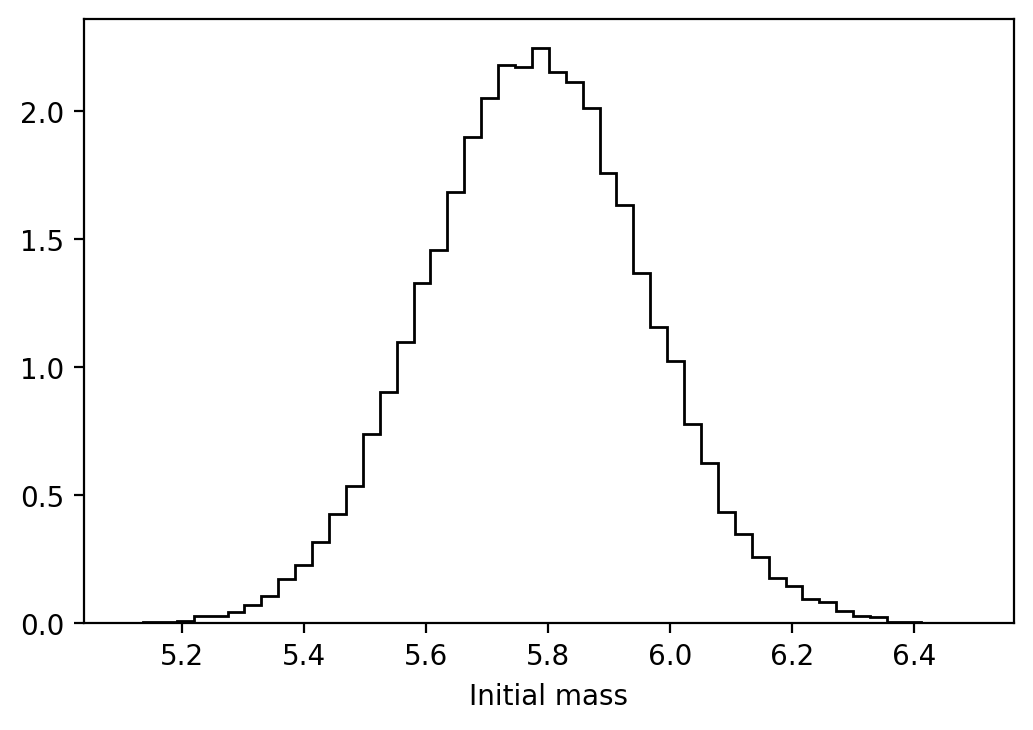

In [13]:
plt.hist(samples[:,0],50,color='k',histtype='step',density=True)
plt.gcf().set_dpi(200)
axf = plt.gca()
axf.set_xlabel('Initial mass')
plt.show()

In [14]:
samplesC = testC.run_mcmc(5.0e9, 16)

/Users/bridgethaas/miniconda3/envs/python3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


Mean acceptance fraction: 0.493
Autocorrelation time: 20.31 steps


Text(0.5, 0, 'Initial mass')

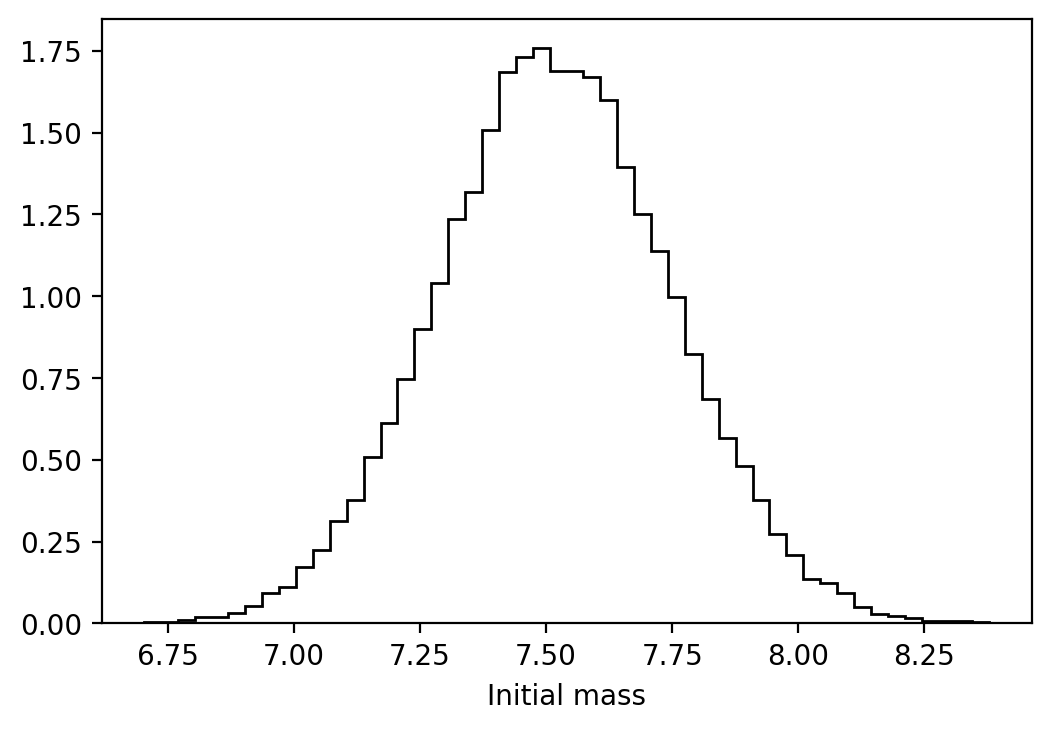

In [15]:
plt.hist(samplesC[:,0],50,color='k',histtype='step',density=True)
plt.gcf().set_dpi(200)
axf = plt.gca()
axf.set_xlabel('Initial mass')
#axf.set_ylabel('p($m$)')

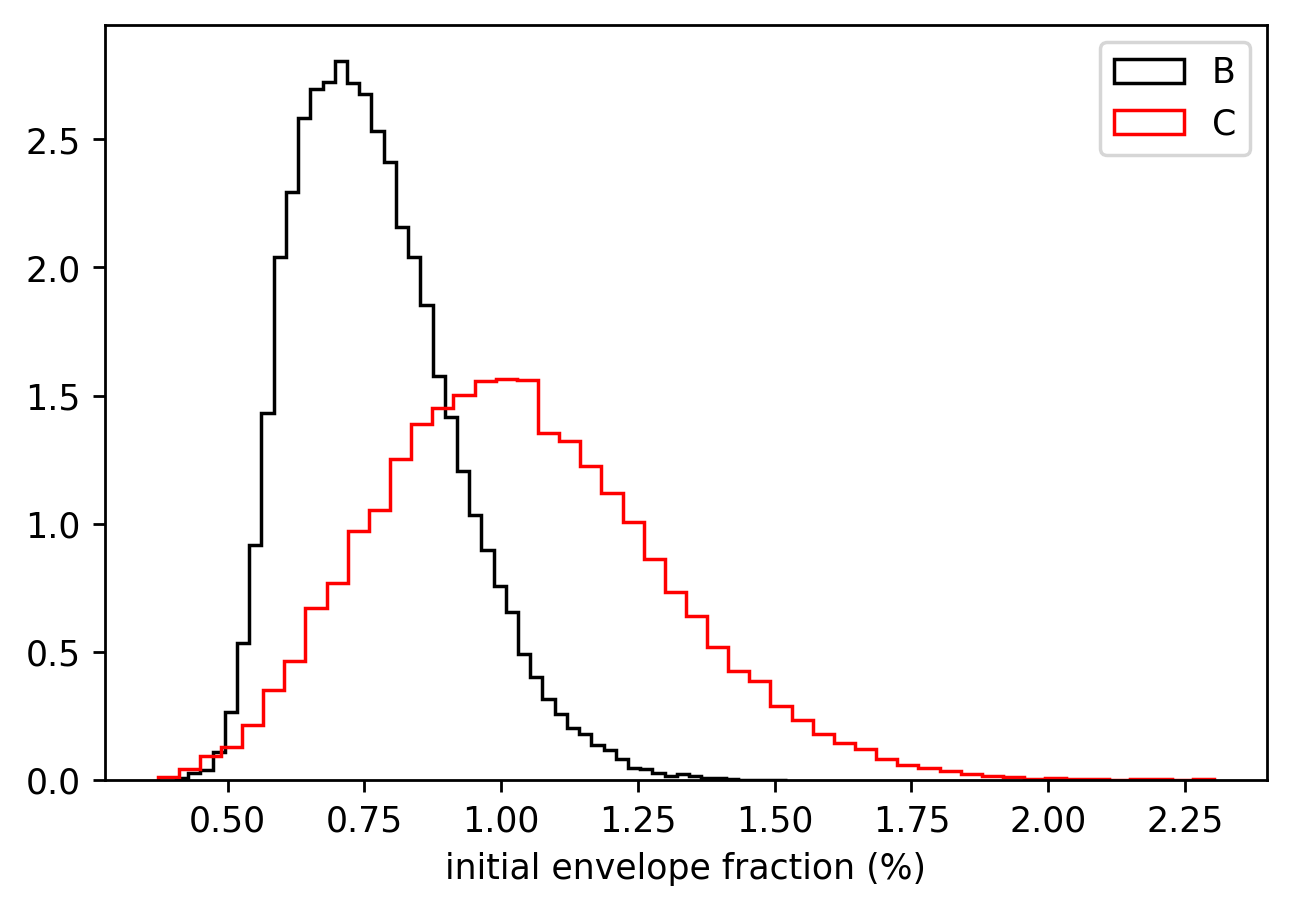

In [16]:
fig = plt.figure()
ax = fig.gca()
ax.hist(samples[:,1]*100,50,color='k',histtype='step',density=True,label='B')
ax.hist(samplesC[:,1]*100,50,color='r',histtype='step',density=True,label='C')
ax.set_xlabel('initial envelope fraction (%)')
ax.legend(loc=0)
fig.set_dpi(250)
plt.show()

In [18]:
ffs, deltas = testB.final_fs_for_samples(samples)

Text(0.75, 0.85, 'Planet B')

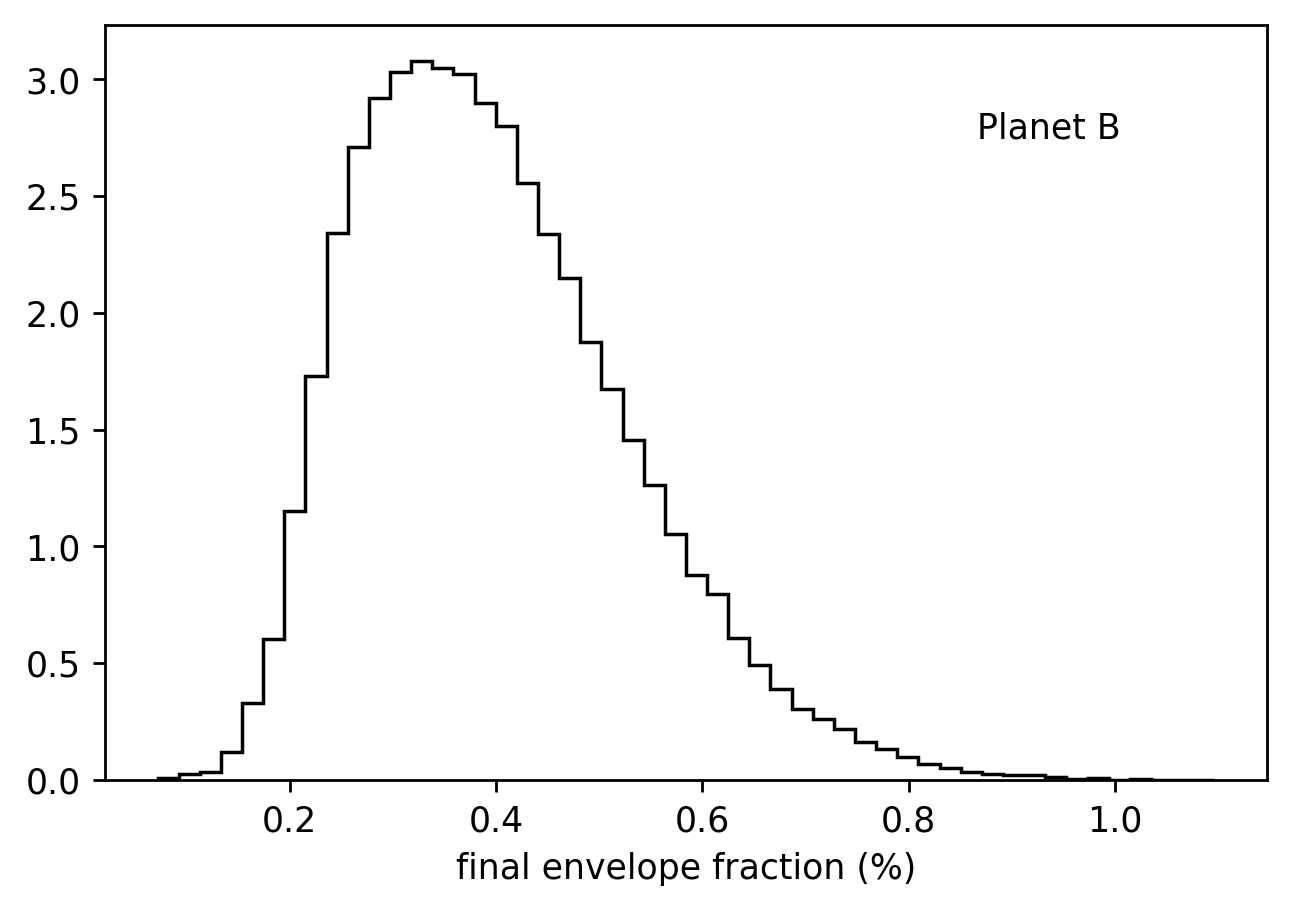

In [19]:
plt.hist(ffs*100,50,color='k',density=True,histtype='step')
plt.gcf().set_dpi(250)
plt.gca().set_xlabel('final envelope fraction (%)')
plt.text(0.75, 0.85, 'Planet B', transform=plt.gca().transAxes)

Text(0.75, 0.85, 'Planet B')

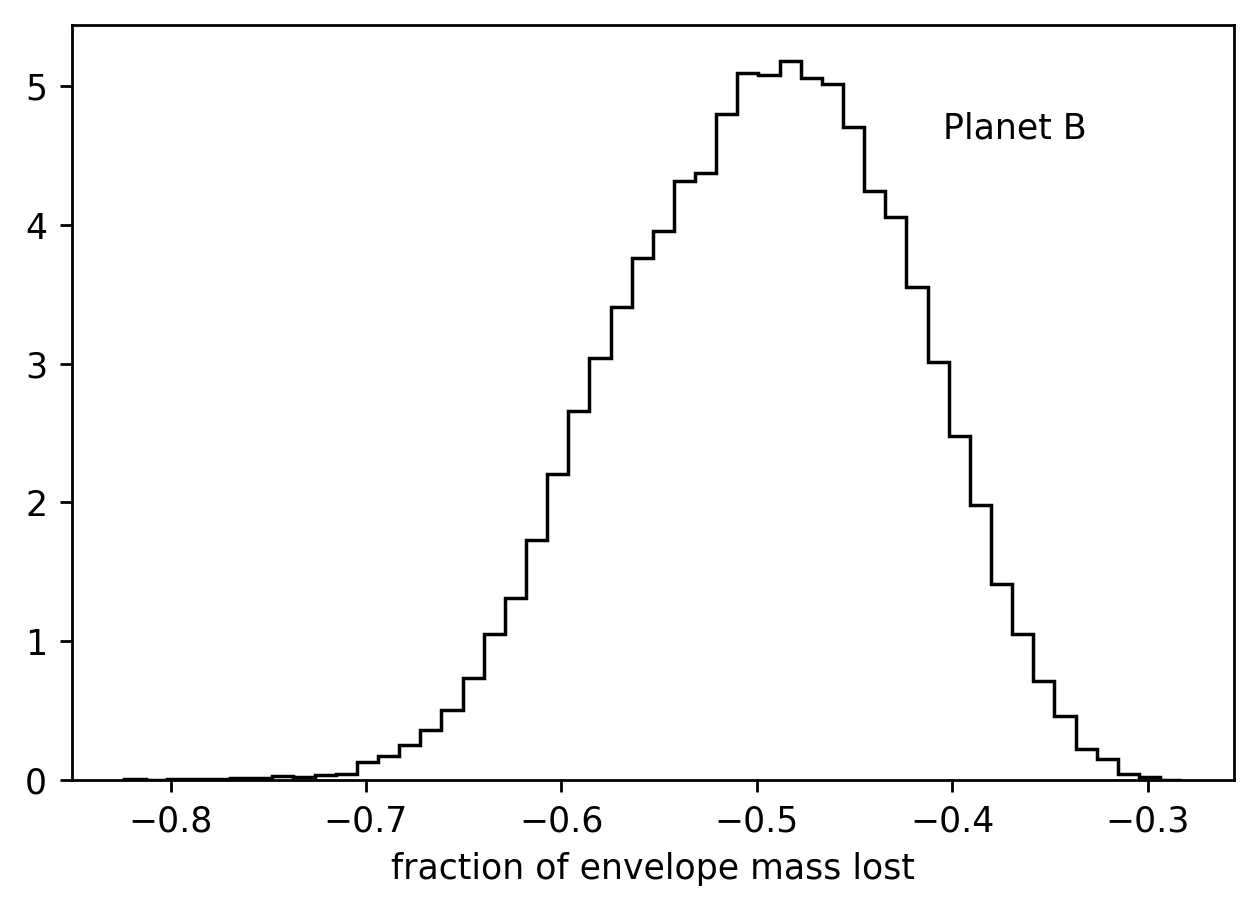

In [20]:
plt.hist(deltas,50,color='k',density=True,histtype='step')
plt.gcf().set_dpi(250)
plt.gca().set_xlabel('fraction of envelope mass lost')
plt.text(0.75, 0.85, 'Planet B', transform=plt.gca().transAxes)

In [21]:
ffsC, deltasC = testC.final_fs_for_samples(samplesC)

Text(0.75, 0.85, 'Planet C')

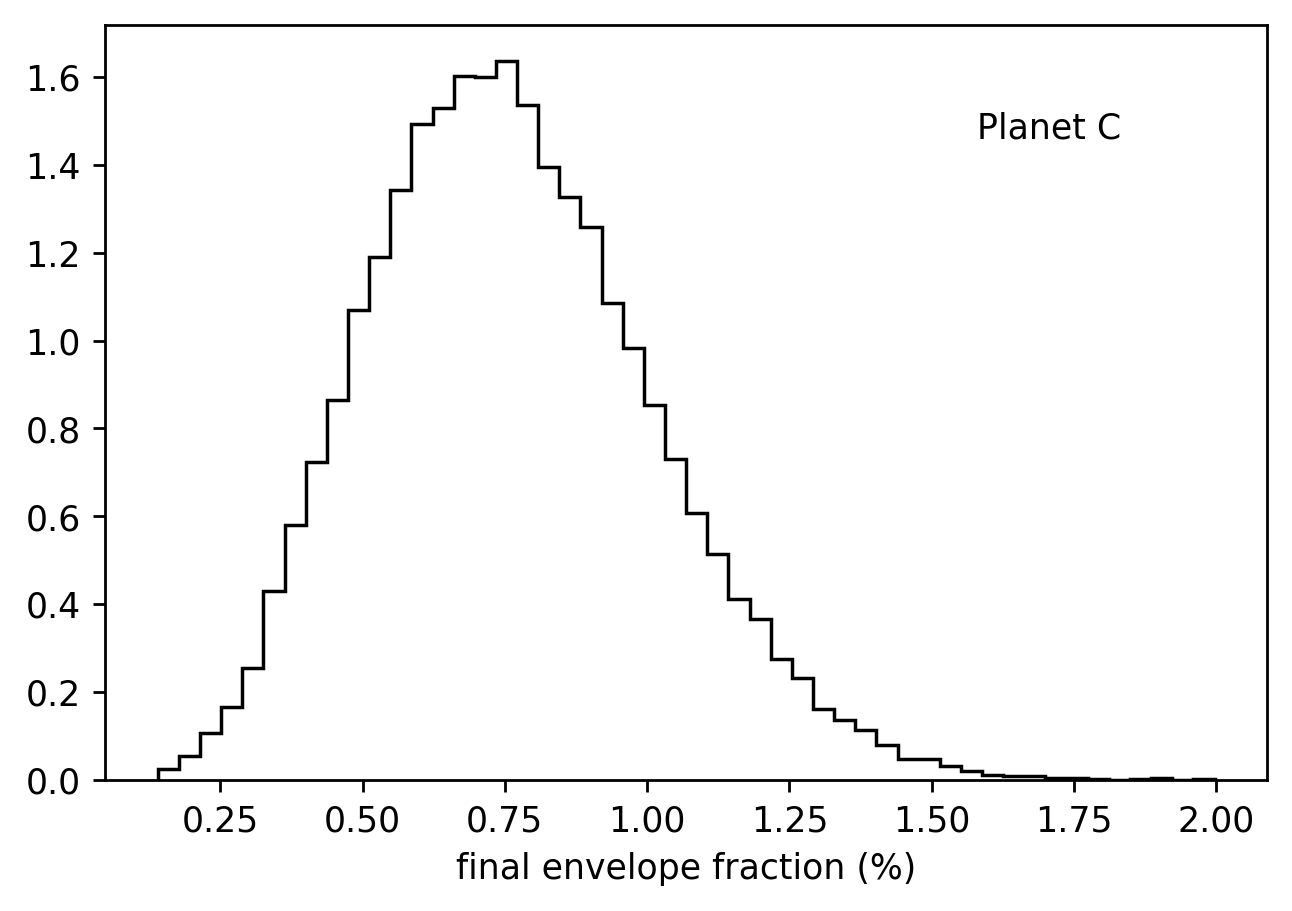

In [22]:
plt.hist(ffsC*100,50,color='k',density=True,histtype='step')
plt.gcf().set_dpi(250)
plt.gca().set_xlabel('final envelope fraction (%)')
plt.text(0.75, 0.85, 'Planet C', transform=plt.gca().transAxes)

Text(0.15, 0.85, 'Planet C')

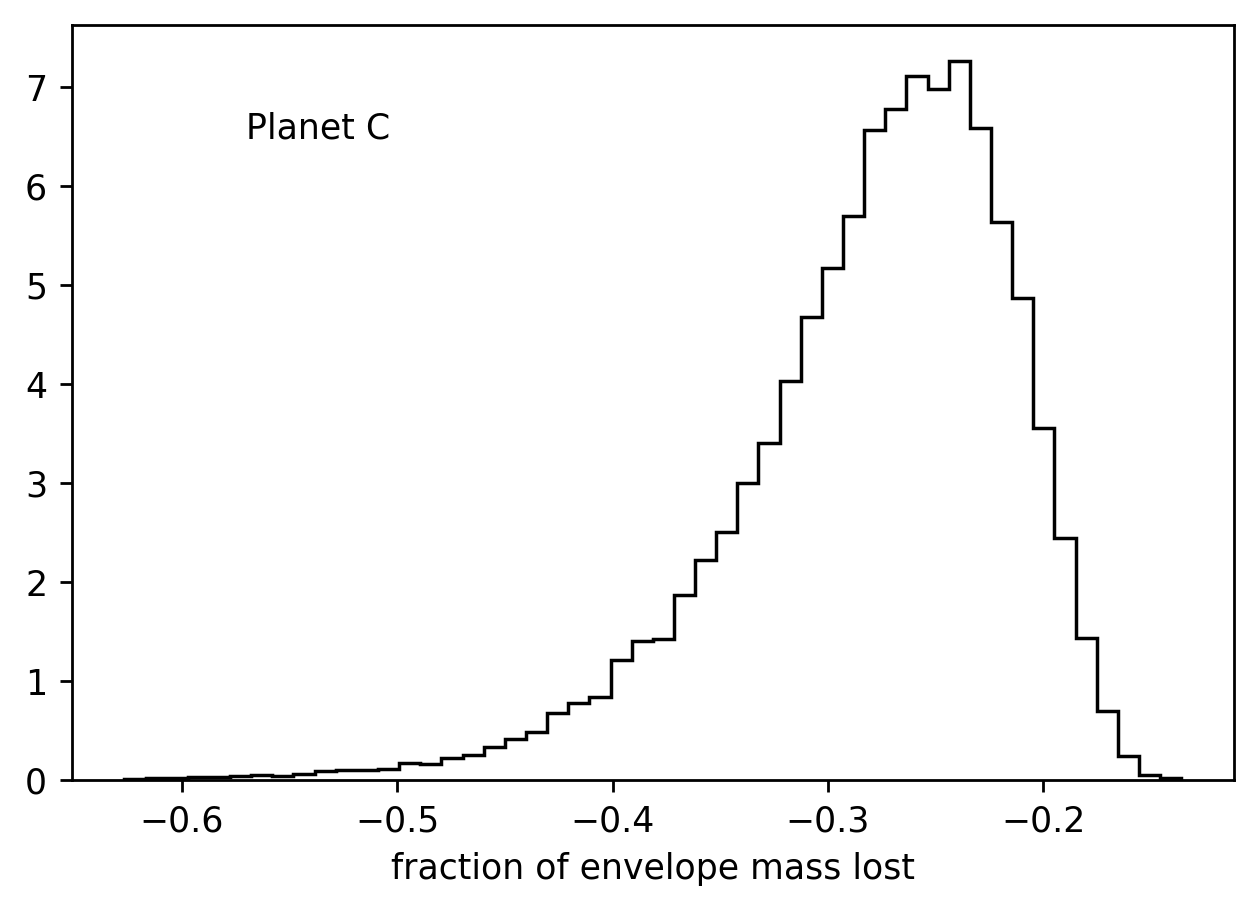

In [23]:
plt.hist(deltasC,50,color='k',density=True,histtype='step')
plt.gcf().set_dpi(250)
plt.gca().set_xlabel('fraction of envelope mass lost')
plt.text(0.15, 0.85, 'Planet C', transform=plt.gca().transAxes)

In [202]:
newsamples = testB.run_mcmc(5.0e9,16)

Mean acceptance fraction: 0.486
Autocorrelation time: 17.86 steps


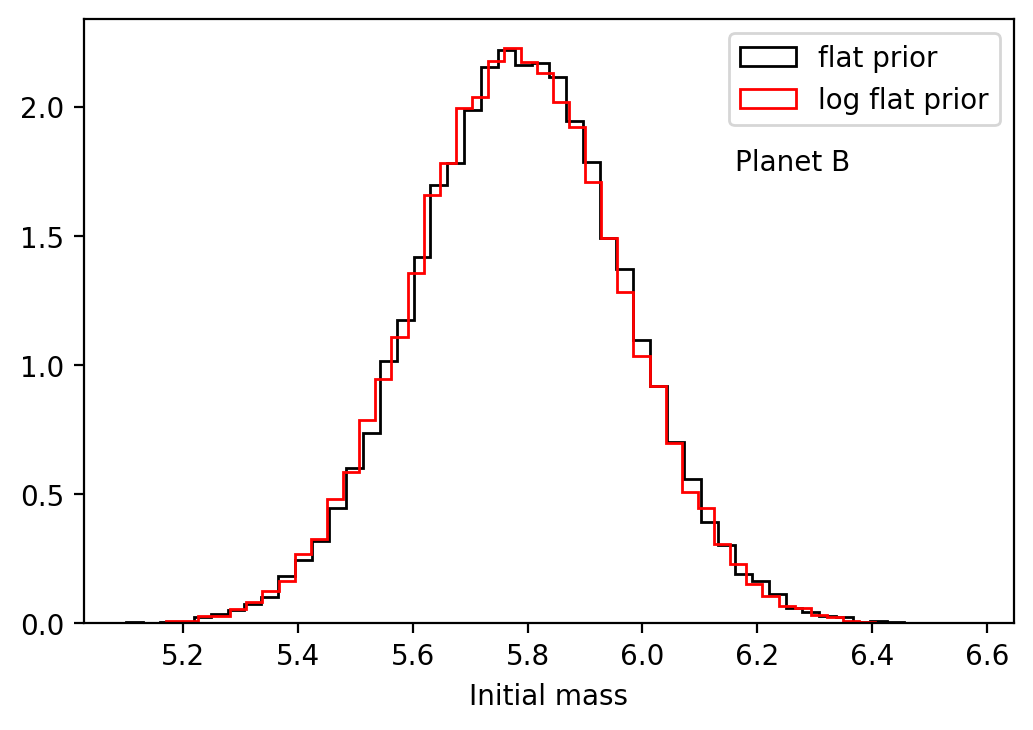

In [225]:
plt.hist(newsamples[:,0],50,color='k',histtype='step',density=True, label='flat prior')
plt.hist(logflatsamples[:,0],50,color='r',histtype='step',density=True, label='log flat prior')
plt.gcf().set_dpi(200)
axf = plt.gca()
axf.set_xlabel('Initial mass')
axf.legend(loc=0)
plt.text(0.7, 0.75, 'Planet B', transform=plt.gca().transAxes)
plt.show()

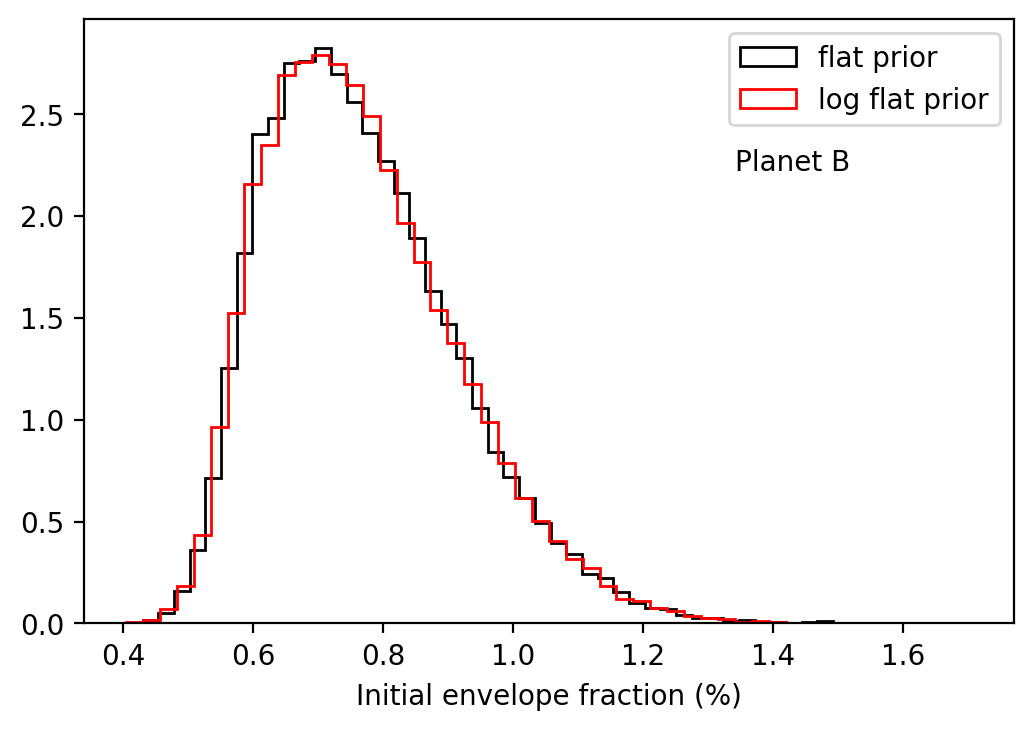

In [224]:
plt.hist(newsamples[:,1]*100,50,color='k',histtype='step',density=True, label='flat prior')
plt.hist(logflatsamples[:,1]*100,50,color='r',histtype='step',density=True, label='log flat prior')
plt.gcf().set_dpi(200)
axf = plt.gca()
axf.set_xlabel('Initial envelope fraction (%)')
plt.text(0.7, 0.75, 'Planet B', transform=plt.gca().transAxes)
axf.legend(loc=0)
plt.show()

In [205]:
logflatsamples = testB.run_mcmc(5.0e9,16,prior='logflat')

Mean acceptance fraction: 0.486
Autocorrelation time: 19.90 steps


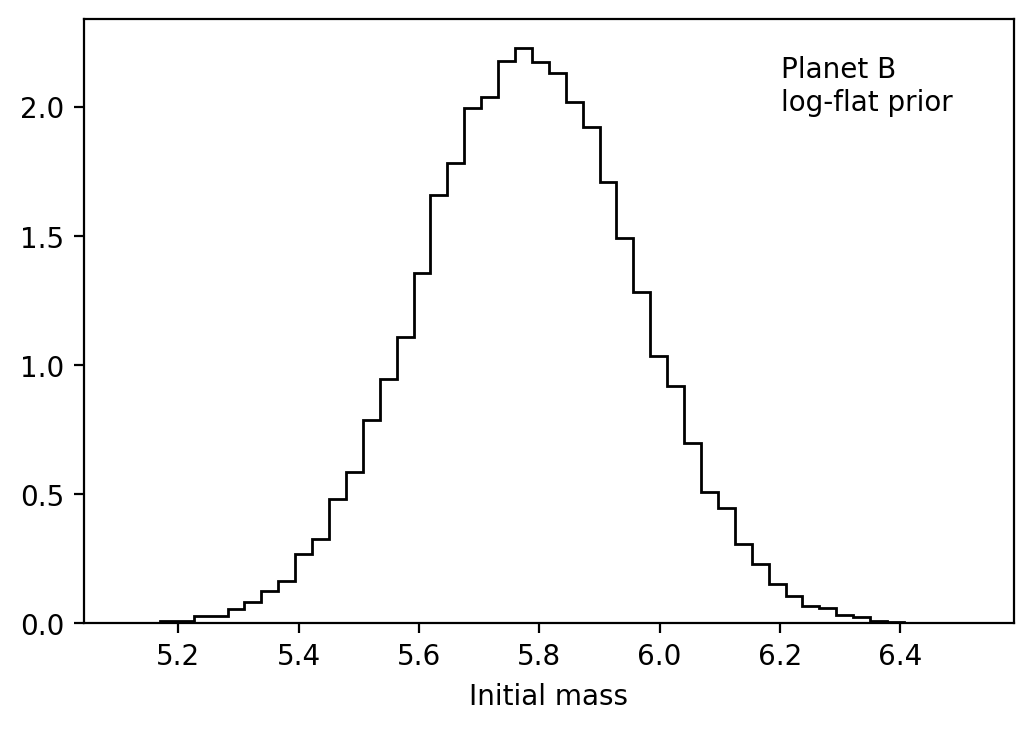

In [206]:
plt.hist(logflatsamples[:,0],50,color='k',histtype='step',density=True)
plt.gcf().set_dpi(200)
axf = plt.gca()
axf.set_xlabel('Initial mass')
#plt.text(0.75, 0.85, 'Planet B\nlog-flat prior', transform=plt.gca().transAxes)
plt.show()

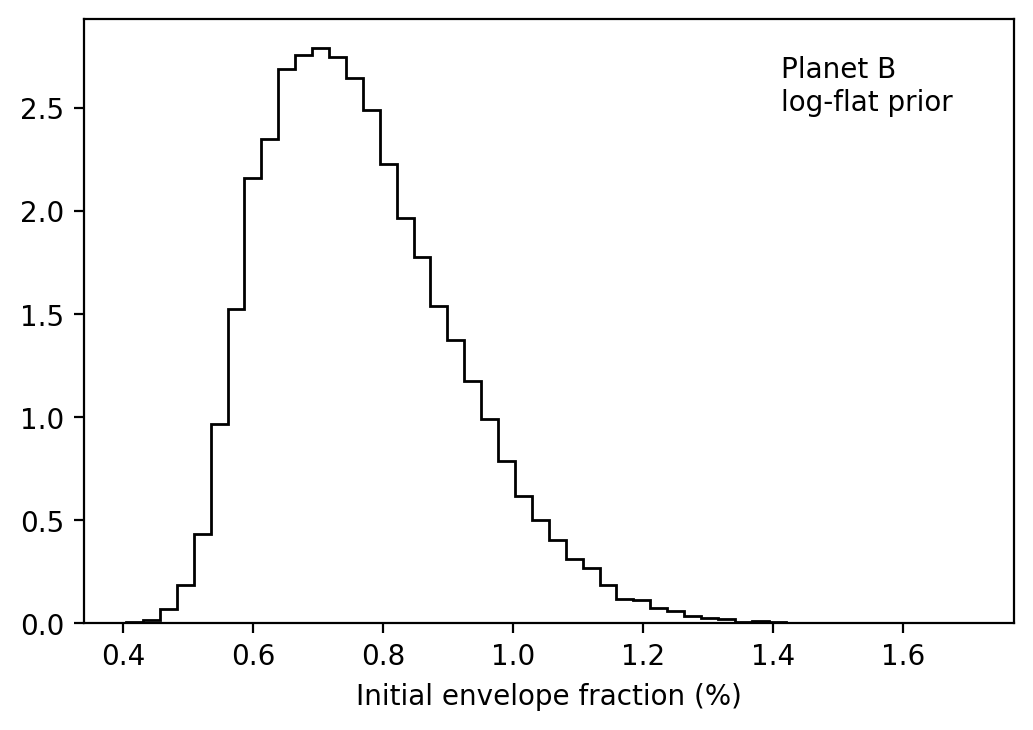

In [208]:
plt.hist(logflatsamples[:,1]*100,50,color='k',histtype='step',density=True)
plt.gcf().set_dpi(200)
axf = plt.gca()
axf.set_xlabel('Initial envelope fraction (%)')
plt.text(0.75, 0.85, 'Planet B\nlog-flat prior', transform=plt.gca().transAxes)
plt.show()

In [226]:
flatC = testC.run_mcmc(5.0e9, 16)

Mean acceptance fraction: 0.491
Autocorrelation time: 20.26 steps


In [227]:
logC = testC.run_mcmc(5.0e9, 16, prior='logflat')

Mean acceptance fraction: 0.490
Autocorrelation time: 18.49 steps


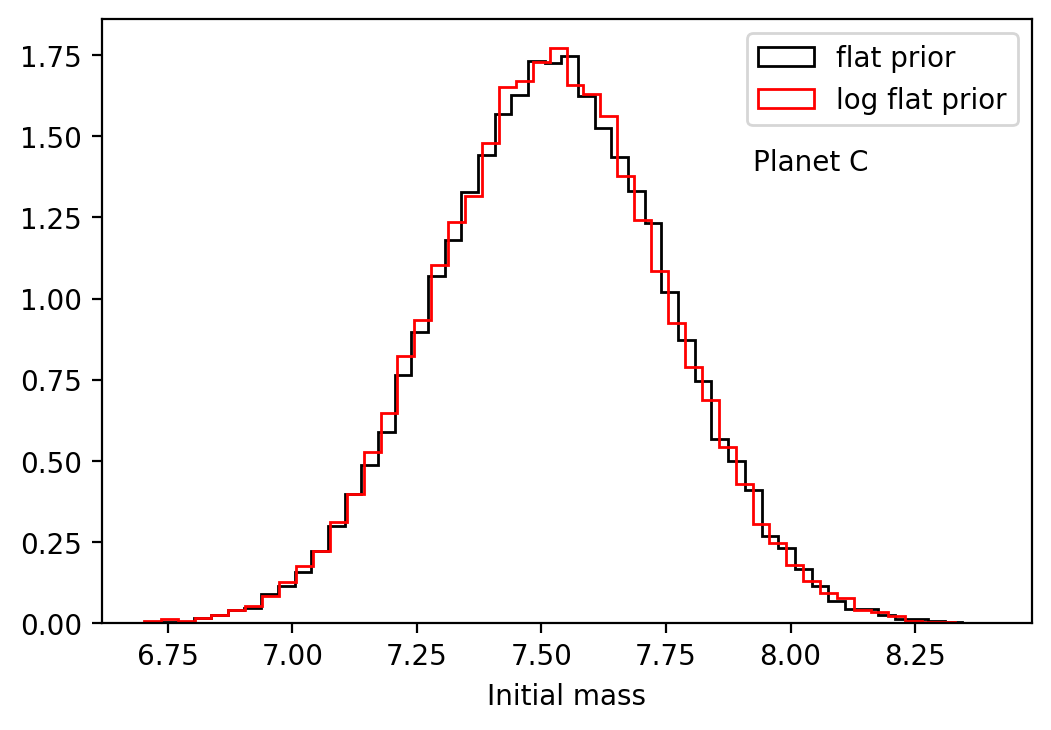

In [229]:
plt.hist(flatC[:,0],50,color='k',histtype='step',density=True, label='flat prior')
plt.hist(logC[:,0],50,color='r',histtype='step',density=True, label='log flat prior')
plt.gcf().set_dpi(200)
axf = plt.gca()
axf.set_xlabel('Initial mass')
axf.legend(loc=0)
plt.text(0.7, 0.75, 'Planet C', transform=plt.gca().transAxes)
plt.show()

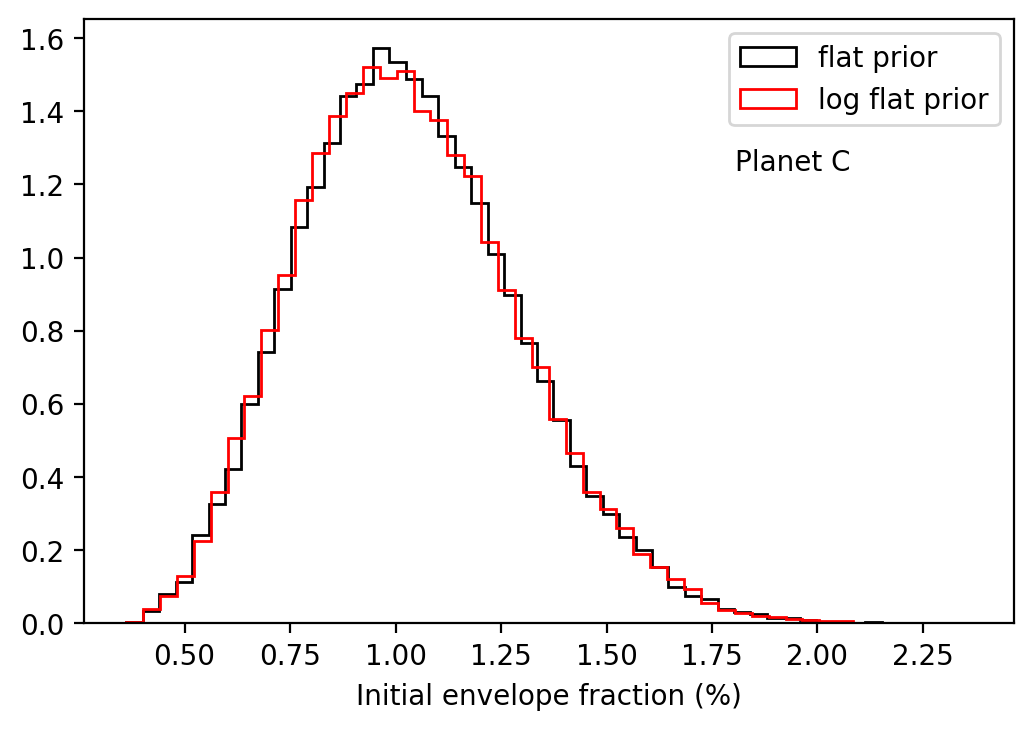

In [230]:
plt.hist(flatC[:,1]*100,50,color='k',histtype='step',density=True, label='flat prior')
plt.hist(logC[:,1]*100,50,color='r',histtype='step',density=True, label='log flat prior')
plt.gcf().set_dpi(200)
axf = plt.gca()
axf.set_xlabel('Initial envelope fraction (%)')
plt.text(0.7, 0.75, 'Planet C', transform=plt.gca().transAxes)
axf.legend(loc=0)
plt.show()

In [24]:
aaron_samples = np.load('planet_parameters.npy')
#R_b R_c M_b M_c
r_bs = aaron_samples[:,0]
r_cs = aaron_samples[:,1]
m_bs = aaron_samples[:,2]
m_cs = aaron_samples[:,3]

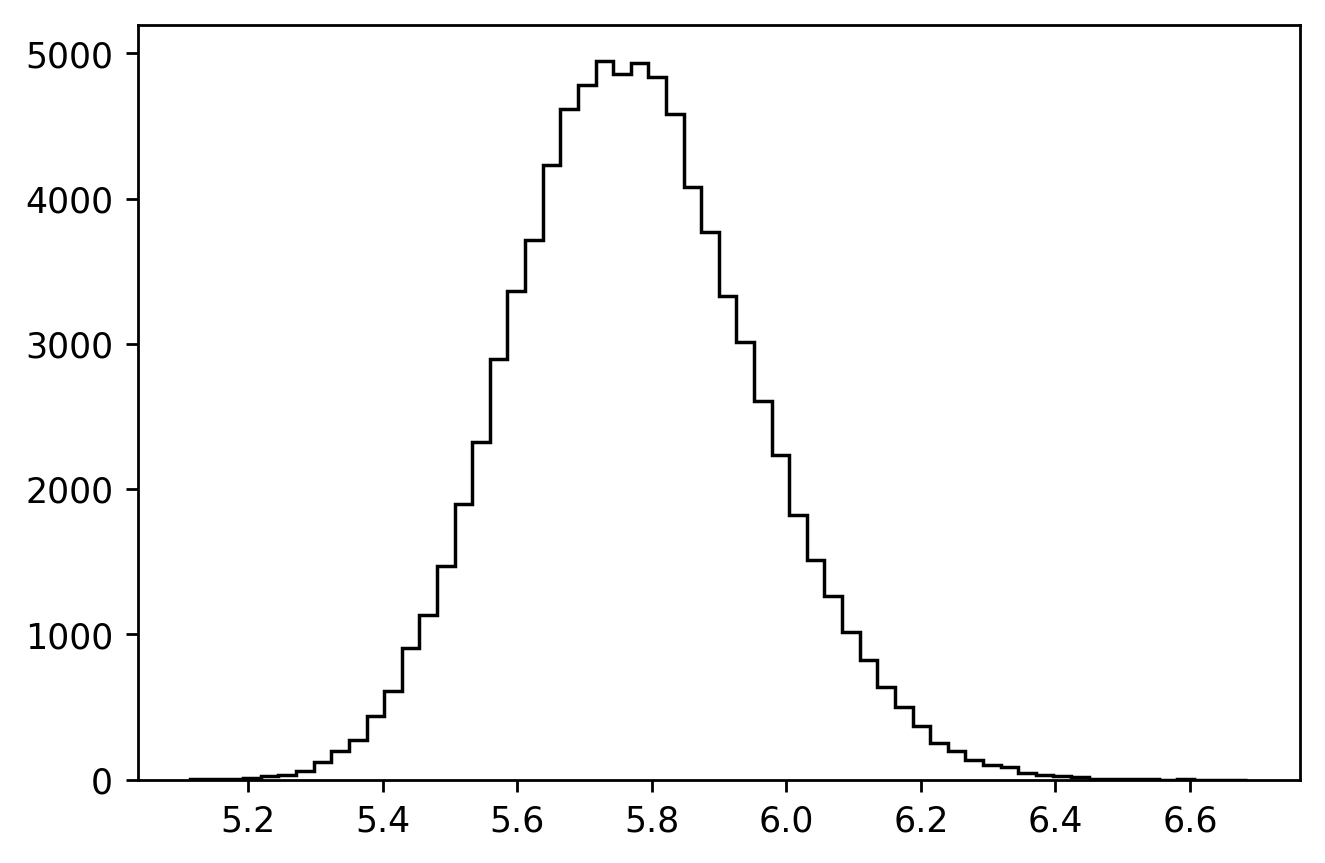

In [25]:
plt.hist(m_bs,60,histtype='step',color='k')
plt.gcf().set_dpi(250)

In [26]:
kernel = stats.gaussian_kde(aaron_samples.T)
print(aaron_samples.shape)

(85200, 4)


In [27]:
b_samples = np.array([r_bs, m_bs]) # R_b, M_b
c_samples = np.array([r_cs, m_cs]) #R_c, M_c
print(np.array(b_samples).shape)

(2, 85200)


In [48]:
b_kernel = stats.gaussian_kde(b_samples)

b_r_min = np.min(b_samples[0])
b_r_max = np.max(b_samples[0])

b_m_min = np.min(b_samples[1])
b_m_max = np.max(b_samples[1])

b_dense_rs = np.linspace(b_r_min, b_r_max, 250)
b_dense_ms = np.linspace(b_m_min, b_m_max, 250)
b_grid_rs, b_grid_ms = np.meshgrid(b_dense_rs, b_dense_ms)
b_grid_rs, b_grid_ms = b_grid_rs.flatten(), b_grid_ms.flatten()
b_grid = np.column_stack((b_grid_rs, b_grid_ms))
print(b_grid.shape)

(62500, 2)


In [100]:
ker_values = b_kernel(b_grid.T)
print(ker_values.max(), ker_values.sum())

KeyboardInterrupt: 

In [ ]:
print(ker_values.shape)

In [44]:
new_b_grid = np.reshape(b_grid, (250, 250, 2))

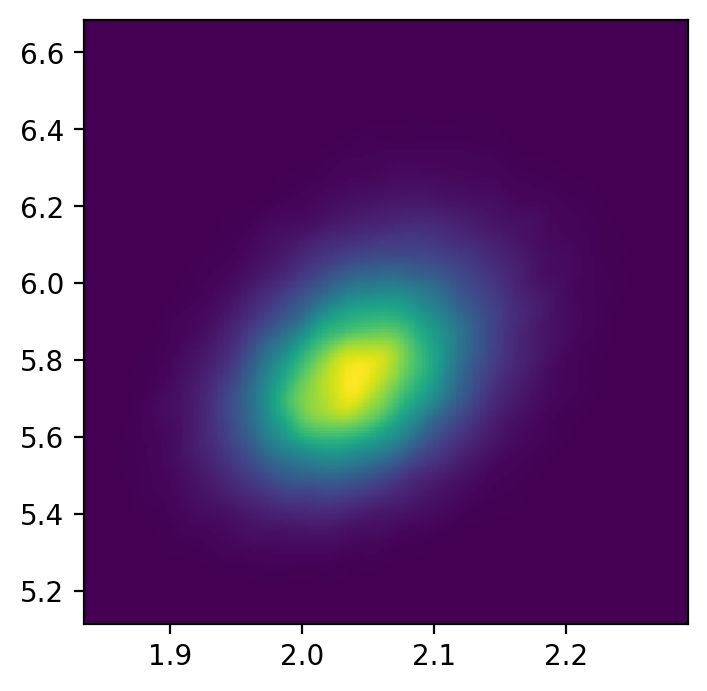

In [33]:
plt.imshow(ker_values.reshape(250, 250), origin='lower', extent=(b_r_min, b_r_max, b_m_min, b_m_max))
plt.gca().set_aspect((b_r_max - b_r_min) / (b_m_max - b_m_min))

plt.gcf().set_dpi(200)

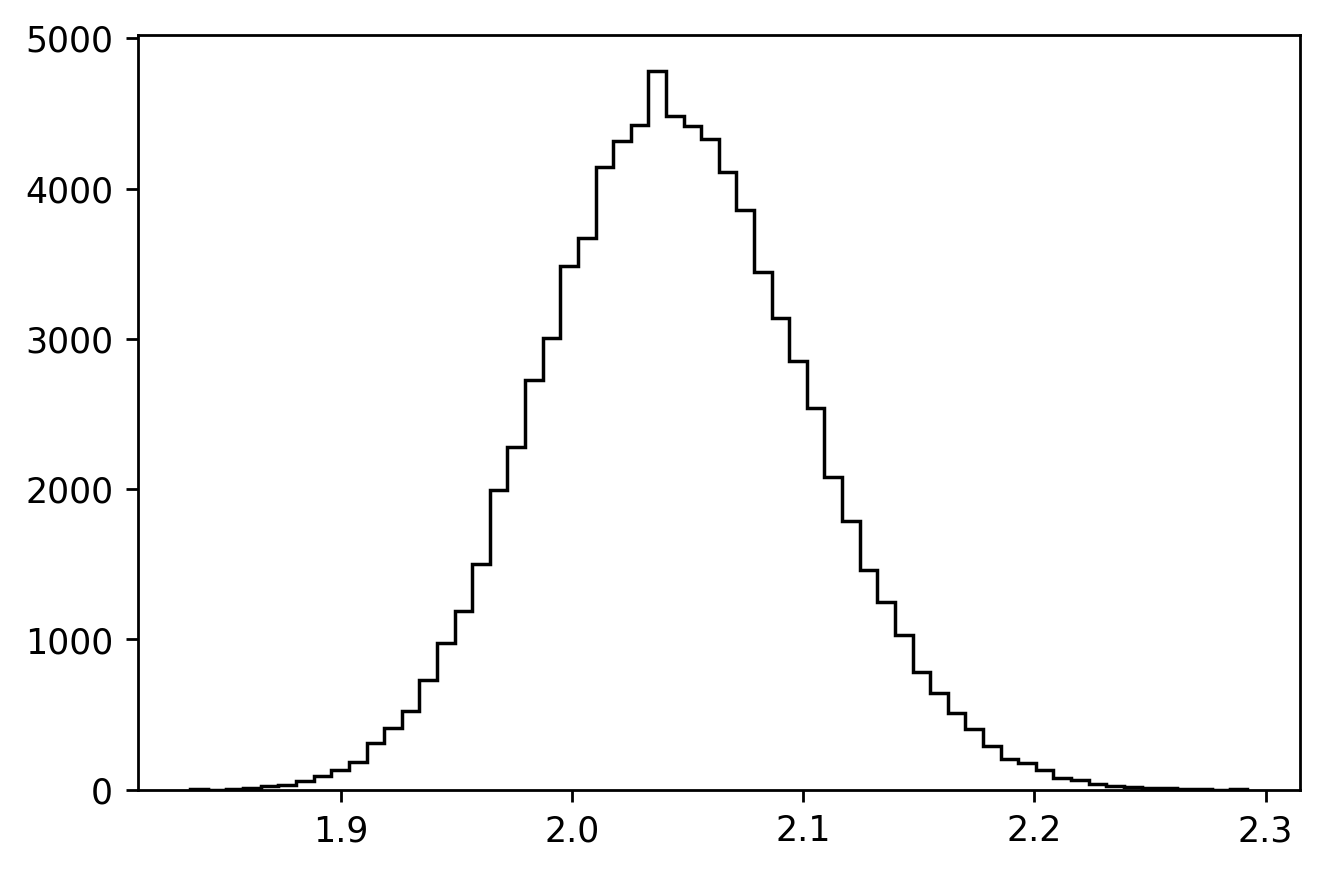

In [307]:
plt.hist(r_bs,60,histtype='step',color='k')
plt.gcf().set_dpi(250)

In [84]:
#2d gaussian fn 
#mu_m = 

def gaussian2d(r, m):
    exponent = - 0.5 * ( 
        (( (m - testB.mass) / testB.mass_unc ) ** 2) + 
        (( (r - testB.radius) / testB.radius_unc ) ** 2) )

    val = np.exp(exponent)
    return val

In [90]:
print(gaussian2d(b_grid[:,0], b_grid[:,1]))
print(b_grid.shape)

[3.82284286e-06 4.24215063e-06 4.70304578e-06 ... 4.63307974e-10
 4.07999008e-10 3.58956580e-10]
(62500, 2)


Text(0, 0.5, 'planet mass')

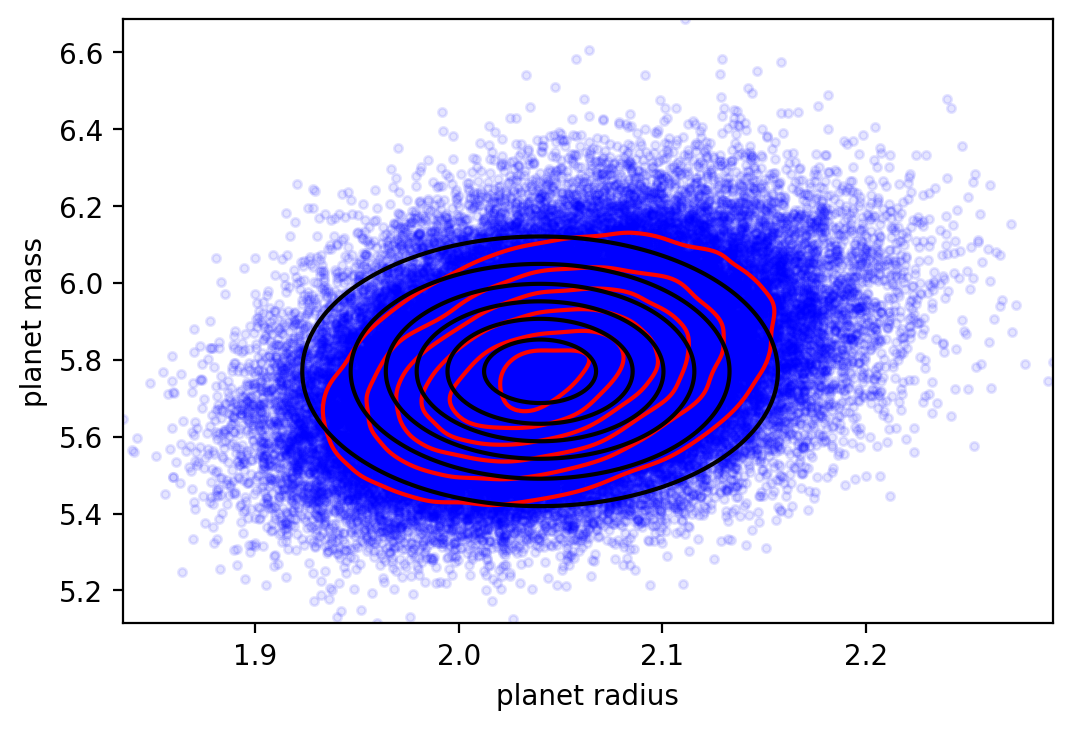

In [119]:
plt.plot(b_samples[0,:], b_samples[1,:],'b.', alpha=0.1, markeredgewidth=1, zorder=0)
plt.contour(b_grid[:,0].reshape(250, 250), b_grid[:,1].reshape(250, 250), 
            gaussian2d(b_grid[:,0], b_grid[:, 1]).reshape(250, 250), 
            6,colors='k')
plt.contour(b_grid[:,0].reshape(250, 250), b_grid[:,1].reshape(250, 250), 
            ker_values.reshape(250, 250), 
            6,colors='r',zorder=1)
plt.gcf().set_dpi(200)
plt.gca().set_xlabel('planet radius')
plt.gca().set_ylabel('planet mass')